In [25]:
! pip install pandas geopandas matplotlib descartes pygeos

In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

In [28]:
plt.rcParams['figure.figsize'] = (20, 10)

In [29]:
madrid = gpd.read_file('data/districts.geojson').dropna().to_crs("crs")

In [30]:
madrid.rename(columns={'name': 'district'}, inplace=True)
madrid = madrid[['district', 'geometry']]
madrid['district'] = madrid['district'].str.lower()
madrid.head()

,district,geometry
0,centro,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,arganzuela,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,retiro,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,salamanca,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,chamartin,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."


<AxesSubplot:>

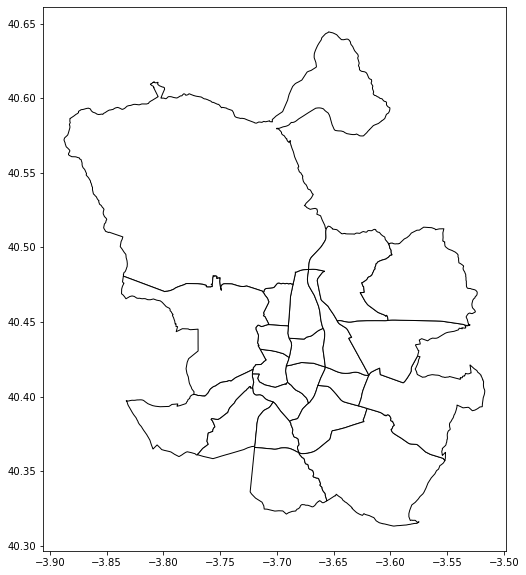

In [31]:
madrid.plot(color='white', edgecolor='black')

In [32]:
consumption = pd.read_csv('datasets/consumo_energia_edificios.csv', index_col='ID', sep=';', skip_blank_lines=True).dropna()
consumption.rename(columns={
    'DISTRITO': 'district',
    'A�O': 'year',
    'MES': 'month',
    'COORDENADA-X': 'x',
    'COORDENADA-Y': 'y',
    'LONGITUD': 'longitude',
    'LATITUD': 'latitude',
    'CLASE': 'class',
    'GRUPO': 'group',
    'UNIDADES': 'units',
    'CONSUMO': 'consumption'
}, inplace=True)
consumption = consumption[['district', 'class', 'group', 'units', 'consumption']]
consumption = consumption[consumption['units'] == 'kWh']
consumption['consumption'] = pd.to_numeric(consumption['consumption'], errors='coerce')
consumption['district'] = consumption['district'].str.lower()

In [33]:
consumption.columns

Index(['district', 'class', 'group', 'units', 'consumption'], dtype='object')

In [34]:
madrid.columns

Index(['district', 'geometry'], dtype='object')

In [35]:
bare_consumption = consumption[['district', 'consumption']]
districts = madrid[['district']]

In [36]:
consumption_by_district = districts.merge(bare_consumption, on='district').dropna().groupby('district', as_index=False).sum()

In [37]:
consumption_by_district

,district,consumption
0,arganzuela,808550.0
1,barajas,289396.0
2,carabanchel,151827.0
3,centro,2546964.0
4,ciudad lineal,416094.0
5,fuencarral-el pardo,1077483.0
6,hortaleza,408827.0
7,latina,451254.0
8,moratalaz,62172.0
9,puente de vallecas,263717.0


In [38]:
map_with_consumption = consumption_by_district.merge(madrid, on='district', how='outer')
map_with_consumption.head()
#data = {
#    'district': consumption_by_district['district']
#}

,district,consumption,geometry
0,arganzuela,808550.0,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
1,barajas,289396.0,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40..."
2,carabanchel,151827.0,"MULTIPOLYGON (((-3.72346 40.40622, -3.72345 40..."
3,centro,2546964.0,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
4,ciudad lineal,416094.0,"MULTIPOLYGON (((-3.62058 40.41671, -3.62031 40..."


In [39]:
#consumption_by_district.columns = ['district', 'consumption', 'geometry']
#map_with_consumption.index = map_with_consumption['district']
map_with_consumption.set_index('district', inplace=True)

In [45]:
map_with_consumption.head()

,consumption,geometry
district,,
arganzuela,808550.0,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
barajas,289396.0,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40..."
carabanchel,151827.0,"MULTIPOLYGON (((-3.72346 40.40622, -3.72345 40..."
centro,2546964.0,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
ciudad lineal,416094.0,"MULTIPOLYGON (((-3.62058 40.41671, -3.62031 40..."


In [41]:
gdf = map_with_consumption.set_geometry('geometry')

In [42]:
type(map_with_consumption)

pandas.core.frame.DataFrame

In [43]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

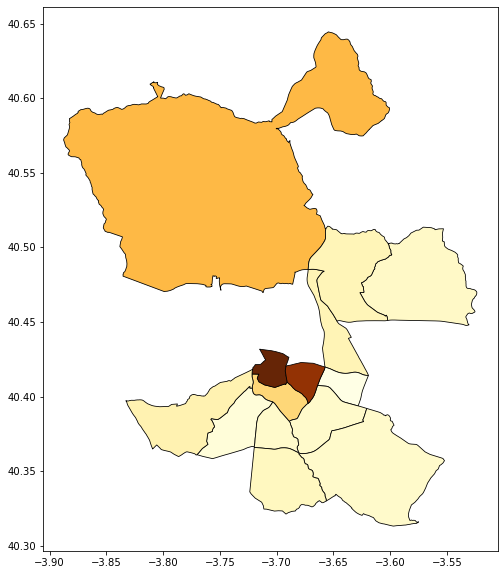

In [44]:
gdf.plot(column='consumption', cmap='YlOrBr', linewidth=0.8, edgecolor='black')